In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [5]:
#Problem Statement 
#The objective of this project is to predict Rating on a dataset containing 16 features. The target variable is Rating.

#1.Data Loading
#import necessary_libraries, load_training and testing_datasets

#2.Data Exploration
#see data, dataset_info, display_summary_stats, examine_null_values, distribution of Target value,
#identify_numeric_features, visualize_outliers, explore_and_visualize_correlation_matrix

#3.Data Preprocessing
#split_features_target, drop_punctuation, drop_stopwards

#4.Feature Engineering
# droping null values, Anova Test, numerical_scaling, categorical_scaling, text_scaling

#5.Model 
#Logistic Regression, Ridge Classifier, Random Forest Classifier, SGD Classifier, XGB Classifier,
# LightGBM Classifier

#6.Model Comparison
# Training and Testing accuracy, Classification Report, Roc Curve

#7.Tune Model
# LightGBN using Randomized Search CV

#8.Top 3 Model comparism
# Using Bar char for precision, recall, f1_score and accuracy

#9.Submission
#save_predictions_to_CSV

In [2]:
# importing all necessary library

import html
import re
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot  as plt
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import uniform, randint
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import warnings

### Loading Data

In [3]:
data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

# Data Exploration

In [4]:
#
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
#preview of training data
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [8]:
## Checking Null values
data.isin([np.nan,'?']).sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [9]:
# Descriptive statistics of numerical data
data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [10]:
# Descriptive statistics of categorical training data

data.describe(include='object')

,RecipeName,CommentID,UserID,UserName,Recipe_Review
count,13636,13636,13636,13636,13634
unique,100,13636,10783,10620,13370
top,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,Delicious!
freq,553,1,20,21,12


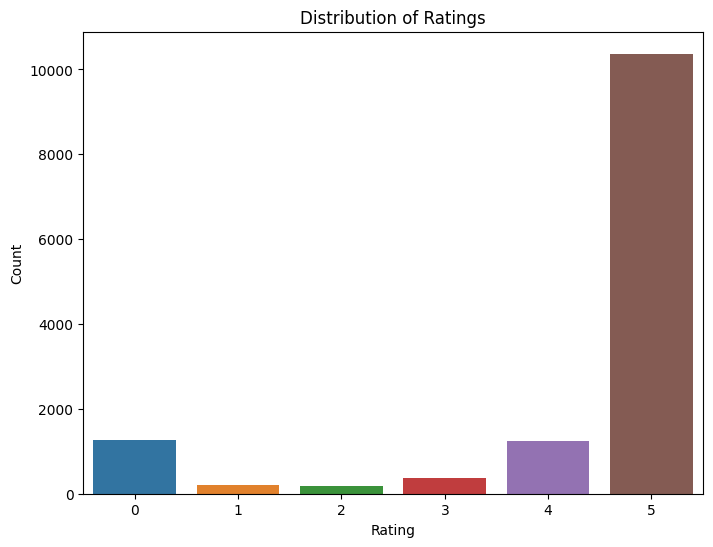

In [14]:
# Label Distribution Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [15]:
# Identify numerical Columns
numerical_columns = data.select_dtypes(include=['float64','int64']).columns
print("\nNumerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore'],
      dtype='object')


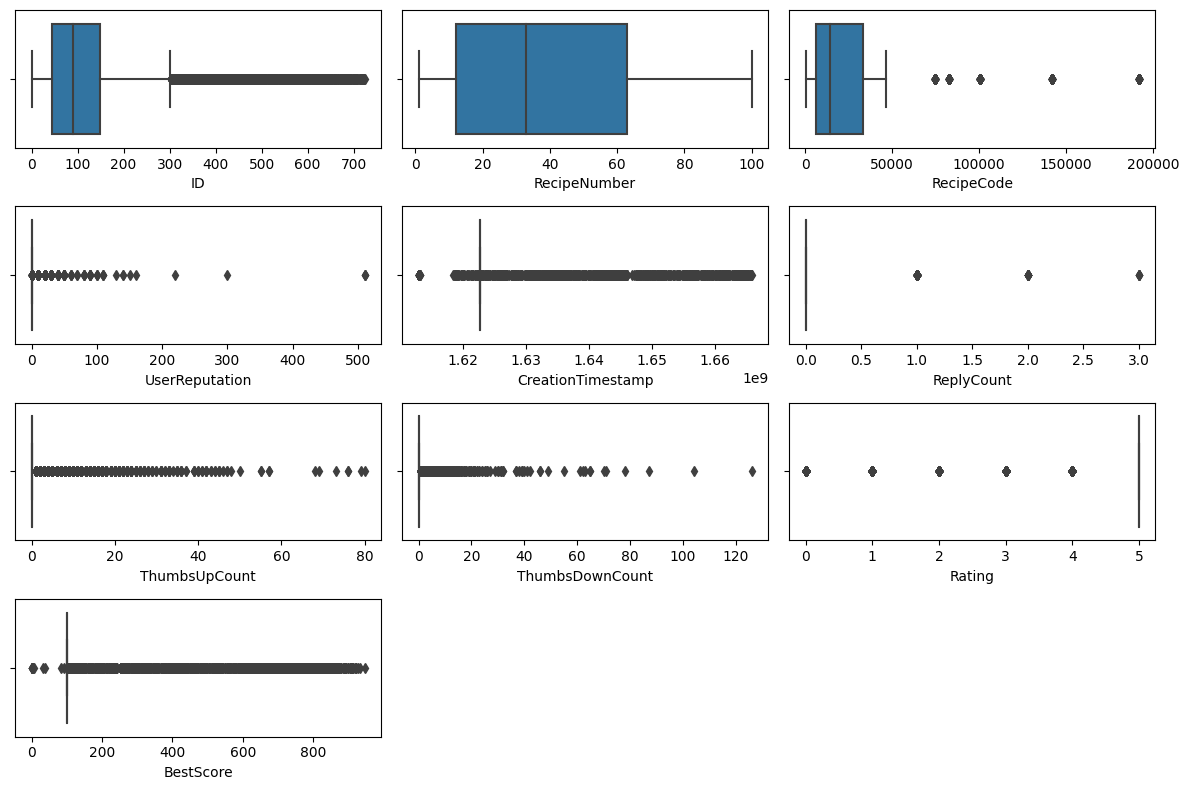

In [16]:
# Visualizing Outliers of numerical columns
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()


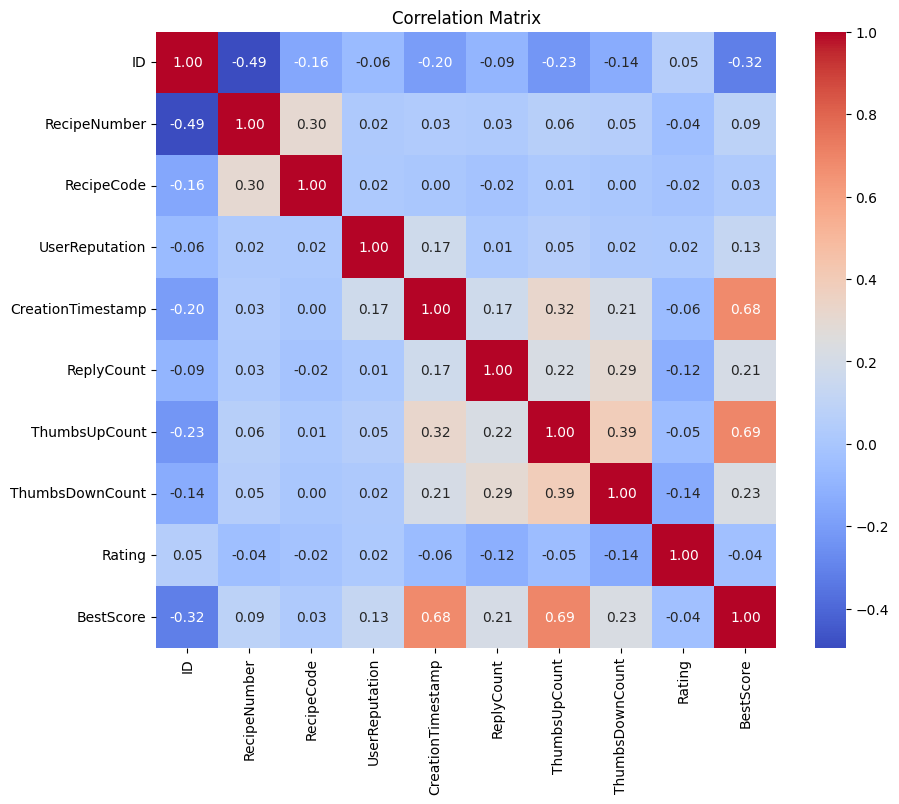

In [17]:
## Creating Heat map for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[ data.select_dtypes(include='number').columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

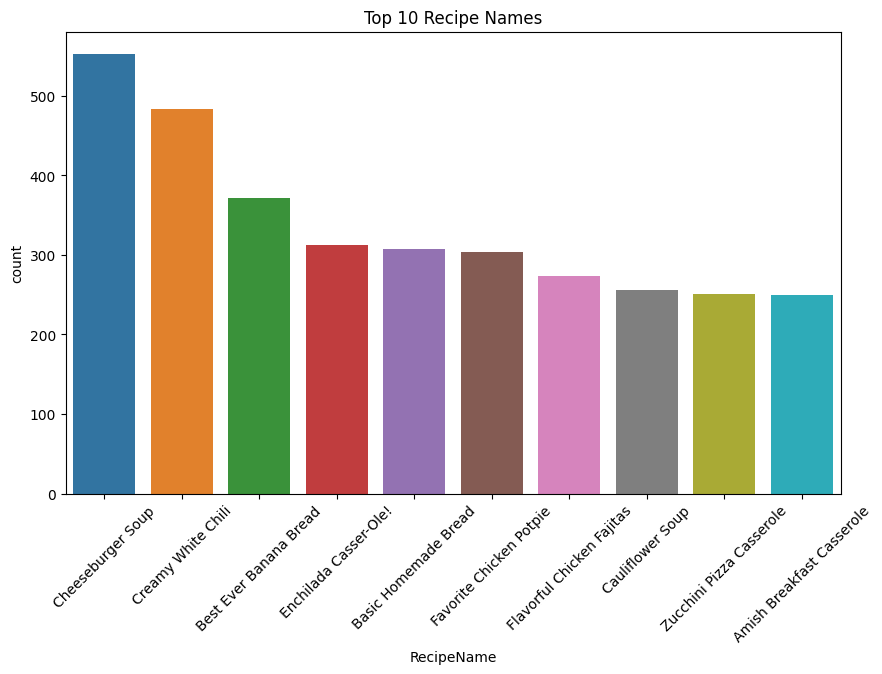

In [18]:
# Visualize distributions of Top 10 Recipe Names
plt.figure(figsize=(10, 6))
sns.countplot(x='RecipeName', data=data, order=data['RecipeName'].value_counts().index[:10])
plt.title('Top 10 Recipe Names')
plt.xticks(rotation=45)
plt.show()

# text preprocessing

In [8]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Text cleaning functions
        def remove_puntuation_html(text):
            text = html.unescape(text)
            # Remove HTML tags
            text = re.sub(r'<[^>]+>', '', text)
            # Remove punctuation, HTML entities, and convert to lowercase
            text = re.sub(r'[^\w\s]', '', text.lower())
            return text
        
        def remove_stopwords(text):
            more_stopwords = ['also','hi','em','would','let','went','ff','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','u','v','w','y','z','soooooo','oh','un','pb','didnt','fyi','x','gr','oz','ia','goooouooood','may','sooo','non','dont','oz','se','ton','el','mmmm','oj','lt','couldnt',
              'fo','xl','mmmmmmmmmmmmmm','ir','lid','k','tom','au', 'xxxx','lb','lg','ot', 'sa', 'bbq','tho','arent','yay','yeah','gf','pg','isnt','whim','lo','ww','pts','ad','hmmmmmm','de','hmmmm','ts','joe','pa','tia','onto','bc','uk','dah','witht','tbl','da','ty','wont','ths','ie','gt','vic','ish','han','ap','ito','tbs','ony','soo','hr','pkg','wah','la','pm','lf','wa','ohh','ins','jam','ez','ed','san','coma','ca','dh','luv','sop','ta','mug','dr','mmm','yr','ne','ha','boo','tdf','duh','sw','tso','gen','tha','na','mor','ect',
              'ann','vs','im','ome','btw','fl','lip','ree','aka','ps','chs','umm','iv','likea','ono', 'dee','yu','mex','disn','mrs','sp','ppl','andthe','jyst','idk','co','soooooooo','yuk','tbis','dtr', 'dint','oooohhhh','tbls','tp','qt','tj','mmmmmmm','cr','pj','nm','tofh','jb','ut','ian','du','os','itfor','bt','ohhh','ache','haha','pd','wil','imwould','hb','ol','ya','wee','ethis','ti','ii','az','il','amy','ur','ohio','nom','mu','hamb','huh','hobo','nc','yayyy','opt','acs','sb','lm','ehhh','mak','nj','ex','od','al','li','yo','thi','ga','js','vt','foo','eh','nw','chz','cpl','rec','amt','ooohs','aaahs','tb','ooze','og','mmmmmmmm','bd','mc','bu',
              'tx','mmhh','mmmmmmmmm','jf','ft','abd','ohhhh','sooooooooo','lee','ar','soooooooooo','mm','yt','bf','tooo','dd','tg','tv','ec','jp','wy','ckn','rf','wi','ul','ozs','gmo','br','mo','fe','ffs','cam','lu','cp','ck','kk','hehe','ml','oi','wn','tl','mmmh','gs','oe','ho','nto','th','ox','dz','oooh','hmm','mmmmmm','hmmm','oohhhhhhhhhhhhhhh','myyyyyyyyyyy','ea','toooooo','di','doo','sc','ooooh','i','iam', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
               'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am','is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the','and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
               'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again','further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other','some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't",'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',"doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
               "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
            pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, more_stopwords)))
            # Remove stopwords using regex
            text_without_stopwords = re.sub(pattern,'',text,flags=re.IGNORECASE)
            return text_without_stopwords
        
        # Apply text cleaning functions
        cleaned_text = X.apply(remove_puntuation_html)
        cleaned_text = cleaned_text.apply(remove_stopwords)
        return cleaned_text
    

# Feature Engineering

In [9]:
# Droping Null values
data.dropna(inplace=True)

### Anova Test

In [24]:
##   ANOVA test evaluates whether the mean 'Rating' varies significantly across different categories of features

# Define numerical and categorical features
numerical_features = ['RecipeNumber', 'UserReputation', 'CreationTimestamp', 
                      'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
categorical_feature = ['RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']

print("Null hypothesis (H0): There is no significant difference in the rating across different categories of the features\n")
print("Alternative hypothesis (H1): There is a significant difference in the rating across different categories of the features\n")

# Perform ANOVA for 'Rating' as the target variable across different categories of each feature

for cat_feature in categorical_feature:
    groups = []
    for cat_value in data[cat_feature].unique():
        groups.append(data[data[cat_feature] == cat_value]['Rating'])
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA for Rating and {cat_feature}: F-statistic = {f_statistic}, p-value = {p_value}\n")
    
# Perform ANOVA for 'Rating' as the target variable across different categories of each numerical feature
for num_feature in numerical_features:
    f_statistic, p_value = f_oneway(data[num_feature], data['Rating'])
    print(f"ANOVA for Rating and {num_feature}: F-statistic = {f_statistic}, p-value = {p_value}\n")



Null hypothesis (H0): There is no significant difference in the rating across different categories of the features

Alternative hypothesis (H1): There is a significant difference in the rating across different categories of the features

ANOVA for Rating and RecipeCode: F-statistic = 7.202278468210805, p-value = 1.0130640898009527e-90

ANOVA for Rating and RecipeName: F-statistic = 7.202278468210805, p-value = 1.0130640898009527e-90



/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


ANOVA for Rating and CommentID: F-statistic = nan, p-value = nan

ANOVA for Rating and UserID: F-statistic = 3.3358668504923052, p-value = 9.312984757684486e-280

ANOVA for Rating and UserName: F-statistic = 3.116927936030024, p-value = 4.885272125568766e-265

ANOVA for Rating and Recipe_Review: F-statistic = 4.240582567372263, p-value = 9.31190749805328e-41

ANOVA for Rating and RecipeNumber: F-statistic = 18213.11647521589, p-value = 0.0

ANOVA for Rating and UserReputation: F-statistic = 592.9455689749343, p-value = 1.389694779467787e-129

ANOVA for Rating and CreationTimestamp: F-statistic = 1212665701.7059765, p-value = 0.0

ANOVA for Rating and ReplyCount: F-statistic = 103532.44918358377, p-value = 0.0

ANOVA for Rating and ThumbsUpCount: F-statistic = 7026.1105152862965, p-value = 0.0

ANOVA for Rating and ThumbsDownCount: F-statistic = 14648.10983450005, p-value = 0.0

ANOVA for Rating and BestScore: F-statistic = 15192.859443573458, p-value = 0.0



In [10]:
data['CommentID'].value_counts()

CommentID
sp_aUSaElGf_12259_c_149978    1
sp_aUSaElGf_957_c_309588      1
sp_aUSaElGf_2832_c_402836     1
sp_aUSaElGf_46655_c_187738    1
sp_aUSaElGf_8431_c_117947     1
                             ..
sp_aUSaElGf_12540_c_399046    1
sp_aUSaElGf_2832_c_353998     1
sp_aUSaElGf_14299_c_115297    1
sp_aUSaElGf_32480_c_401820    1
sp_aUSaElGf_2832_c_278956     1
Name: count, Length: 13634, dtype: int64

In [11]:
#Droping  values
drop_train_data = data.drop(columns=['CommentID', 'Rating'])
label = data['Rating']
drop_test_data = test.drop(columns=['CommentID'])   


In [12]:

# For text data
text_pipeline = Pipeline([
    ('cleaner', TextCleaner()),  # Custom text cleaner
    ('tfidf', TfidfVectorizer(stop_words='english', lowercase=True))  # TF-IDF vectorizer
])

# For numeric data
numeric_cols = ['RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
numeric_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Standard scaler for normalization
])

# For categorical data
categorical_cols = ['RecipeCode', 'RecipeName', 'UserID', 'UserName']
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding with handle_unknown='ignore'
])

# Define the preprocessing steps for each column type
preprocessor = ColumnTransformer([
    ('text', text_pipeline, 'Recipe_Review'),  # Apply text pipeline to 'Recipe_Review' column
    ('numeric', numeric_pipeline, numeric_cols),  # Apply numeric pipeline to these columns
    ('categorical', categorical_pipeline, categorical_cols)  # Apply categorical pipeline to these columns
])

# Apply the preprocessing steps to the train and test datasets
processed_train_data = preprocessor.fit_transform(drop_train_data)
processed_test_data = preprocessor.transform(drop_test_data)

# Convert to DataFrame without column names
processed_train_data = pd.DataFrame(processed_train_data.toarray())
processed_test_data = pd.DataFrame(processed_test_data.toarray())


In [13]:
# seeing processed train data
processed_train_data

,0,1,2,3,4,5,6,7,8,9,...,34080,34081,34082,34083,34084,34085,34086,34087,34088,34089
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Test split

In [14]:
x_train, x_validation, y_train, y_validation = train_test_split(processed_train_data, label, test_size=0.2, random_state=42)

# Model Training

### Logistic Regression

In [13]:
## Initialization and fitting Logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Checking training and validation Accuracy of Logistic Regression
y_pred = logistic_regression.predict(x_validation)  # Predicting labels for the validation set
y_train_pred = logistic_regression.predict(x_train)  # Predicting labels for the training set

# Calculating training and validation accuracy
train_accuracy_log = accuracy_score(y_train, y_train_pred)
validation_accuracy_log = accuracy_score(y_validation, y_pred)

# Printing training and validation accuracy
print("Logistic Training Accuracy:", train_accuracy_log)
print("Logistic Validation Accuracy:", validation_accuracy_log)


Logistic Training Accuracy: 0.7597872925644081
Logistic Validation Accuracy: 0.7634763476347635


In [51]:
# Making Classification Report for Logistic Regression
classification_rep = classification_report(y_validation, y_pred)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00       248
           5       0.76      1.00      0.87      2082

    accuracy                           0.76      2727
   macro avg       0.13      0.17      0.14      2727
weighted avg       0.58      0.76      0.66      2727



In [11]:
# # Defining Function to create ROC CURVE

# def plot_roc_curve(y_validation, x_validation, classifier_init, classifier_name):
#     """
#     Plot ROC curve for a multiclass classifier.

#     Parameters:
#     - y_validation: array-like, true labels of the validation set
#     - x_validation: array-like, features of the validation set
#     - classifier: trained multiclass classifier with predict or decision_function method
#     - classifier_name: str, name of the classifier for plotting

#     Returns:
#     - None
#     """
#     # Convert y_validation to binary matrix
#     y_bin = label_binarize(y_validation, classes=[0, 1, 2, 3, 4, 5])

#     # Ensure that x_validation and y_validation are used consistently
#     if hasattr(classifier_init, 'predict_proba'):
#         y_pred_proba = classifier_init.predict_proba(x_validation)
#     else:
#         y_pred_proba = classifier_init.decision_function(x_validation)
    
#     # Calculate ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(y_bin.shape[1]):
#         fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
#         roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_proba[:, i])

#     # Plot ROC curve for each class
#     plt.figure(figsize=(8, 6))
#     for i in range(y_bin.shape[1]):
#         plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

#     # Plot micro-average ROC curve
#     fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred_proba.ravel())
#     roc_auc_micro = roc_auc_score(y_bin.ravel(), y_pred_proba.ravel(), average='micro')
#     plt.plot(fpr_micro, tpr_micro, label='Micro Average (AUC = {:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)

#     # Plot macro-average ROC curve
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_bin.shape[1])]))
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(y_bin.shape[1]):
#         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
#     mean_tpr /= y_bin.shape[1]
#     fpr_macro = all_fpr
#     tpr_macro = mean_tpr
#     roc_auc_macro = roc_auc_score(y_bin, y_pred_proba, average='macro')
#     plt.plot(fpr_macro, tpr_macro, label='Macro Average (AUC = {:.2f})'.format(roc_auc_macro), linestyle='--', linewidth=2)

#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve for {} Classifier'.format(classifier_name))
#     plt.legend()
#     plt.grid(True)
#     plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

def plot_roc_curve(y_true, y_pred_prob, class_labels, classifier_name):
    # Binarize the true labels
    y_bin = label_binarize(y_true, classes=np.unique(y_true))

    # Compute ROC curve and ROC area for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
        roc_auc = roc_auc_score(y_bin[:, i], y_pred_prob[:, i])
        plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_labels[i], roc_auc))

    # Plot micro-average ROC curve
    fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred_prob.ravel())
    roc_auc_micro = roc_auc_score(y_bin.ravel(), y_pred_prob.ravel(), average='micro')
    plt.plot(fpr_micro, tpr_micro, label='Micro Average (AUC = {:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)

    # Plot macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr for i in range(len(class_labels))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(class_labels)):
        mean_tpr += np.interp(all_fpr, fpr, tpr)
    mean_tpr /= len(class_labels)
    fpr_macro = all_fpr
    tpr_macro = mean_tpr
    roc_auc_macro = roc_auc_score(y_bin, y_pred_prob, average='macro')
    plt.plot(fpr_macro, tpr_macro, label='Macro Average (AUC = {:.2f})'.format(roc_auc_macro), linestyle='--', linewidth=2)

    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)

    # Set plot labels and legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for {} Classifier'.format(classifier_name))
    plt.legend()
    plt.grid(True)
    plt.show()


In [17]:
# # creating ROC Curve using function
# plot_roc_curve(y_validation, x_validation, logistic_regression, "Logistic Regression")


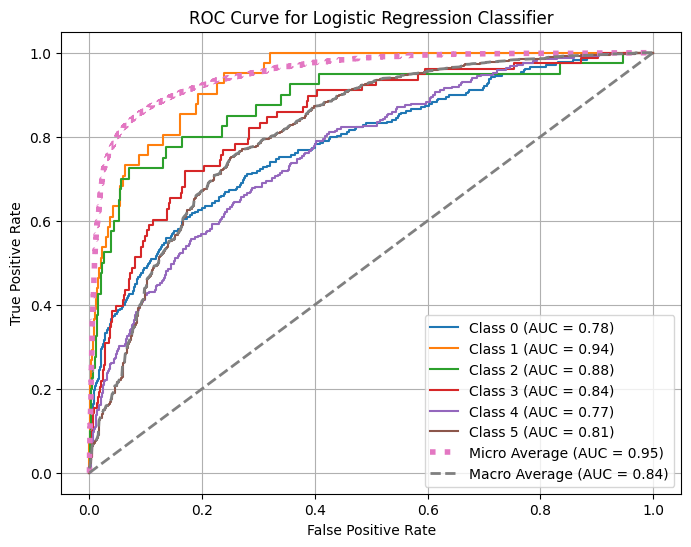

In [19]:
# Checking training and validation Accuracy of Logistic Regression
y_pred_proba = logistic_regression.predict_proba(x_validation)  # Predicting probabilities for the validation set

# Creating ROC Curve using function
plot_roc_curve(y_validation, y_pred_proba, [0, 1, 2, 3, 4, 5], "Logistic Regression")


### Ridge Classifier

In [55]:
# Instantiate and fit RidgeClassifier model
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(x_train, y_train)


RidgeClassifier()

In [56]:
# Predictions on training and validation sets
y_train_pred = ridge_classifier.predict(x_train)
y_pred_validation = ridge_classifier.predict(x_validation)

# Calculate training and validation accuracies
train_accuracy_ridge = accuracy_score(y_train, y_train_pred)
validation_accuracy_ridge = accuracy_score(y_validation, y_pred_validation)

# Print accuracies
print("Ridge Training Accuracy:", train_accuracy_ridge)
print("Ridge Validation Accuracy:", validation_accuracy_ridge)


Ridge Training Accuracy: 0.7613459246355552
Ridge Validation Accuracy: 0.7634763476347635


In [57]:
# Making Classification Report for Ridge Classification
classification_rep_validation = classification_report(y_validation, y_pred_validation)

# Print classification report
print("\nClassification Report on Validation Set:")
print(classification_rep_validation)


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.45      0.04      0.07       238
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00       248
           5       0.77      1.00      0.87      2082

    accuracy                           0.76      2727
   macro avg       0.20      0.17      0.16      2727
weighted avg       0.62      0.76      0.67      2727



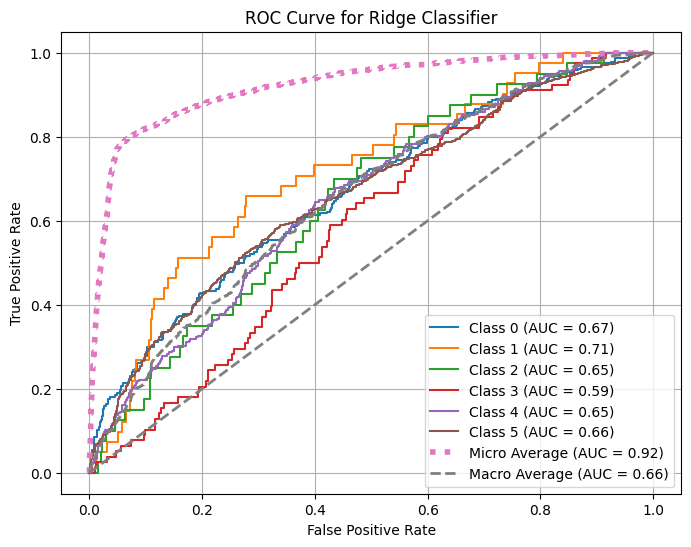

In [58]:
# creating ROC Curve using function For Ridge

plot_roc_curve(y_validation, x_validation, ridge_classifier, "Ridge")

### K Nearest Neighbors classifier

In [59]:
# Initialize and fit the K Nearest Neighbors classifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
# Predict labels for the training and validation sets
y_train_pred = knn_classifier.predict(x_train)
y_pred_validation = knn_classifier.predict(x_validation)

# Calculate accuracy scores for training and validation sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred)
validation_accuracy_knn = accuracy_score(y_validation, y_pred_validation)

print("KNN Training Accuracy:", train_accuracy_knn)
print("KNN Logistic Accuracy:", validation_accuracy_knn)

KNN Training Accuracy: 0.7279728614651142
KNN Logistic Accuracy: 0.7055372203887056


In [62]:
# Generating classification report for K Nearest Neighbors classifier

classification_rep_validation = classification_report(y_validation, y_pred_validation)

print("Classification Report on Validation Set:")
print(classification_rep_validation)

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.14      0.06      0.09       238
           1       0.14      0.02      0.04        41
           2       0.00      0.00      0.00        40
           3       0.12      0.01      0.02        78
           4       0.14      0.08      0.10       248
           5       0.77      0.91      0.83      2082

    accuracy                           0.71      2727
   macro avg       0.22      0.18      0.18      2727
weighted avg       0.62      0.71      0.65      2727



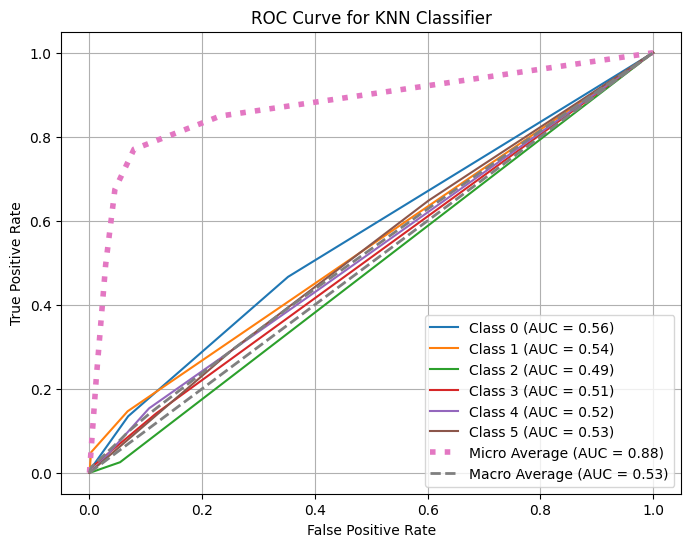

In [63]:
# creating ROC Curve using function For KNN

plot_roc_curve(y_validation, x_validation, knn_classifier, "KNN")


### Random Forest Classifier

In [64]:
# Initialize and fit Random Forest Classifier Model
#It wequen

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
# Predicting labels and calculating accuracy for Random Forest classifier

y_pred_random_forest = random_forest.predict(x_validation)
y_train_pred_random_forest = random_forest.predict(x_train)
accuracy_train_random_forest = accuracy_score(y_train, y_train_pred_random_forest)
accuracy_random_forest = accuracy_score(y_validation, y_pred_random_forest)

# Printing the accuracy scores for Random Forest classifier on training and validation sets
print("Random Forest Training Accuracy:", accuracy_train_random_forest)
print("Random Forest Validation Accuracy:", accuracy_random_forest)


Random Forest Training Accuracy: 1.0
Random Forest Validation Accuracy: 0.7744774477447744


In [66]:
# Generating classification report for Random Forest classifier

classification_report_random_forest = classification_report(y_validation, y_pred_random_forest)
print("Random Forest Classification Report:")
print(classification_report_random_forest)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.08      0.15       238
           1       0.67      0.05      0.09        41
           2       1.00      0.03      0.05        40
           3       0.80      0.05      0.10        78
           4       1.00      0.02      0.03       248
           5       0.77      1.00      0.87      2082

    accuracy                           0.77      2727
   macro avg       0.86      0.20      0.21      2727
weighted avg       0.81      0.77      0.69      2727



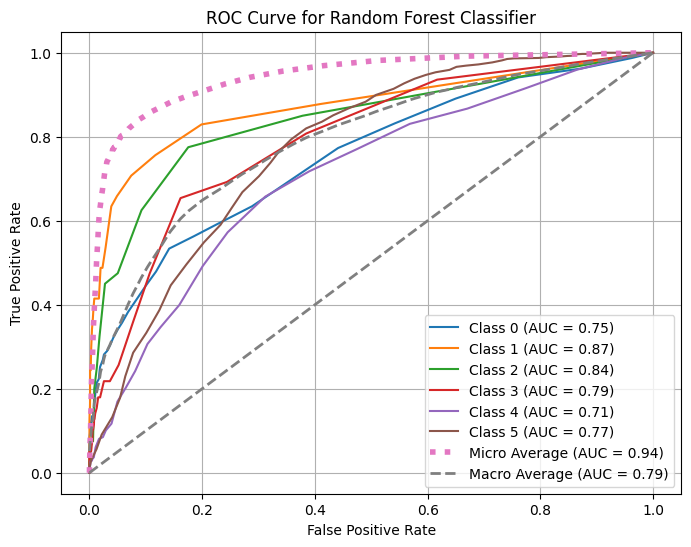

In [67]:
# creating ROC Curve using function For Random Forest

plot_roc_curve(y_validation, x_validation, random_forest, "Random Forest")

### SGD Classifier

In [14]:
# Initialize and train the SGD Classifier Model

sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

In [15]:
# Predicting labels and calculating accuracy for SGD Classifier
y_pred_sgd = sgd_classifier.predict(x_validation)
y_train_pred_sgd = sgd_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred_sgd)
validation_accuracy = accuracy_score(y_validation, y_pred_sgd)

# Printing the accuracy scores for SGD Classifier on training and validation sets
print("SGD Classifier Training Accuracy:", train_accuracy)
print("SGD Classifier Validation Accuracy:", validation_accuracy)


SGD Classifier Training Accuracy: 0.7597872925644081
SGD Classifier Validation Accuracy: 0.7634763476347635


In [16]:
# Generating classification report for SGD Classifier

report = classification_report(y_validation, y_pred_sgd)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00       248
           5       0.76      1.00      0.87      2082

    accuracy                           0.76      2727
   macro avg       0.13      0.17      0.14      2727
weighted avg       0.58      0.76      0.66      2727



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


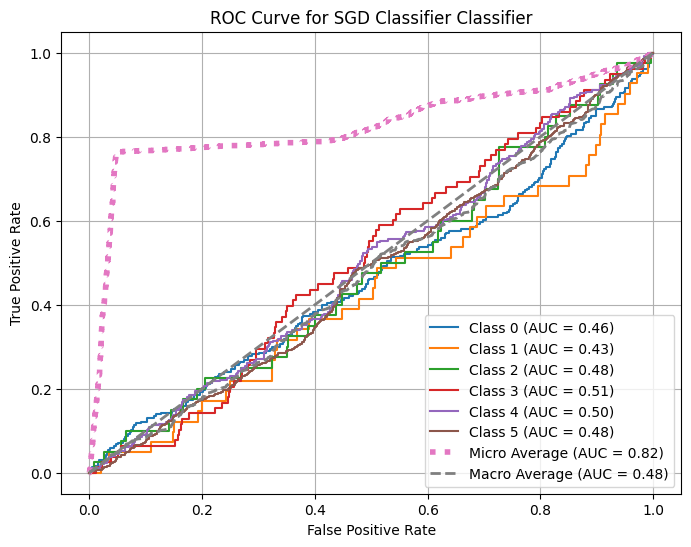

In [19]:
# creating ROC Curve using function For SGD Classifier

plot_roc_curve(y_validation, x_validation, sgd_classifier, "SGD Classifier")

### XGBoost classifier

In [15]:
# Initialize and train the XGBoost classifier

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
# Predicting labels and calculating accuracy for XGBoost Classifier
y_pred_xgb = xgb_classifier.predict(x_validation)
y_train_pred_xgb = xgb_classifier.predict(x_train)
training_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
accuracy_xgb = accuracy_score(y_validation, y_pred_xgb)

# Printing the accuracy scores for XGBoost Classifier on training and validation sets
print("XGBoost Training Accuracy:", training_accuracy_xgb)
print("XGBoost Validation Accuracy:", accuracy_xgb)


XGBoost Training Accuracy: 0.8795269093242871
XGBoost Validation Accuracy: 0.7766776677667767


In [22]:
# Generate classification report for XGBoost 

report_xgb = classification_report(y_validation, y_pred_xgb)
print("\nClassification Report for XGBoost:")
print(report_xgb)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.59      0.17      0.26       238
           1       0.41      0.17      0.24        41
           2       0.00      0.00      0.00        40
           3       0.32      0.12      0.17        78
           4       0.41      0.07      0.12       248
           5       0.80      0.98      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.42      0.25      0.28      2727
weighted avg       0.71      0.78      0.72      2727



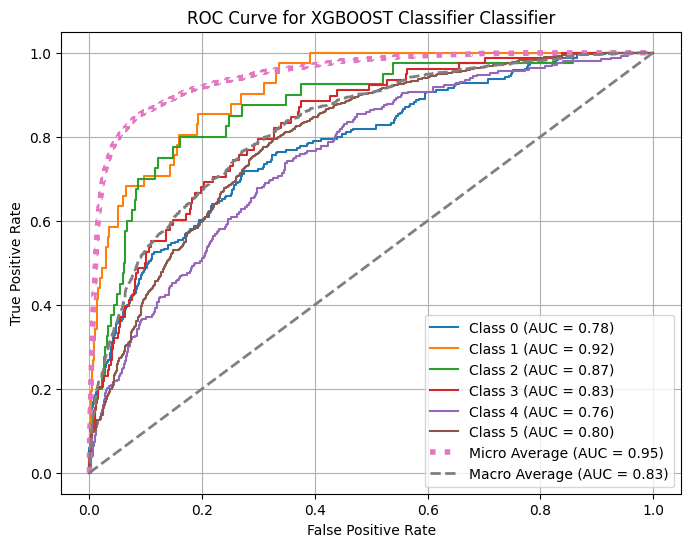

In [23]:
# creating ROC Curve using function For XGBOOST Classifier

plot_roc_curve(y_validation, x_validation, xgb_classifier, "XGBOOST Classifier")

### LightGBM classifier

In [16]:
# Initialize and fit LightGBM classifier Model

lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(x_train, y_train)

LGBMClassifier()

In [25]:
# Predicting labels and calculating accuracy for LightGBM Classifier
y_pred_lgb = lgb_classifier.predict(x_validation)
train_accuracy = lgb_classifier.score(x_train, y_train)
accuracy_lgb = accuracy_score(y_validation, y_pred_lgb)

# Printing the accuracy scores for LightGBM Classifier on training and validation sets
print("LightGBM Training Accuracy:", train_accuracy)
print("LightGBM Validation Accuracy:", accuracy_lgb)


LightGBM Training Accuracy: 0.926560924177134
LightGBM Validation Accuracy: 0.7818115144847818


In [26]:
# Generating classification report for LightGBM classifier

report_lgb = classification_report(y_validation, y_pred_lgb)
print("Classification Report for LightGBM:")
print(report_lgb)

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.57      0.22      0.32       238
           1       0.39      0.17      0.24        41
           2       0.38      0.07      0.12        40
           3       0.34      0.14      0.20        78
           4       0.44      0.11      0.18       248
           5       0.81      0.98      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.49      0.28      0.32      2727
weighted avg       0.73      0.78      0.73      2727



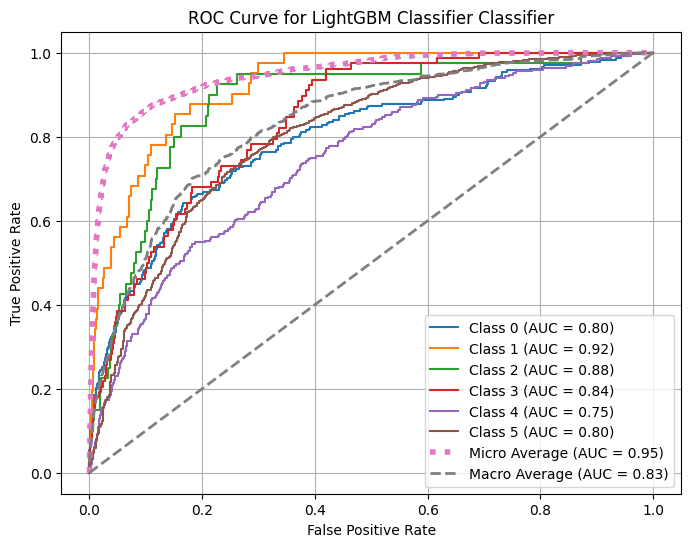

In [27]:
# creating ROC Curve using function For LightGBM Classifier

plot_roc_curve(y_validation, x_validation, lgb_classifier, "LightGBM Classifier")

# Hyper-parameter Tuning

### LightGBM classifier

In [12]:
# Tuning and fit LightGBM classifier Model

lgb_classifier = lgb.LGBMClassifier()

param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist, n_iter=50, cv=stratified_kfold, scoring='accuracy', random_state=42)

random_search.fit(x_train, y_train)



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(), n_iter=50,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b116a1471c0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b1168eee4a0>,
                                        'min_child_weight': <scipy.sta...discrete_frozen object at 0x7b1168eef9a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b1168eed690>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b1168600160>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b1168601a80>},
                   random_state=42, scoring='accuracy')

In [13]:
# Get the best parameters and best score from the random search
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


Best Parameters: {'learning_rate': 0.12964733273336593, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.32078006497173583, 'reg_lambda': 0.18651851039985423}
Best Accuracy: 0.7794070194593672


In [14]:
# Create the LightGBM classifier with the best parameters
best_lgb_classifier = lgb.LGBMClassifier(**best_params)

# Fit the classifier to the training data
best_lgb_classifier.fit(x_train, y_train)

# Predict labels for training and validation sets
y_train_lgb = best_lgb_classifier.predict(x_train)
y_pred_lgb = best_lgb_classifier.predict(x_validation)

# Calculate accuracies
accuracy_training_lgb = accuracy_score(y_train, y_train_lgb)
accuracy_validation_lgb = accuracy_score(y_validation, y_pred_lgb)

# Print the accuracies
print("LightGBM Training Accuracy:", accuracy_training_lgb)
print("LightGBM Validation Accuracy:", accuracy_validation_lgb)


LightGBM Training Accuracy: 0.9675437792243513
LightGBM Validation Accuracy: 0.7825449211587825


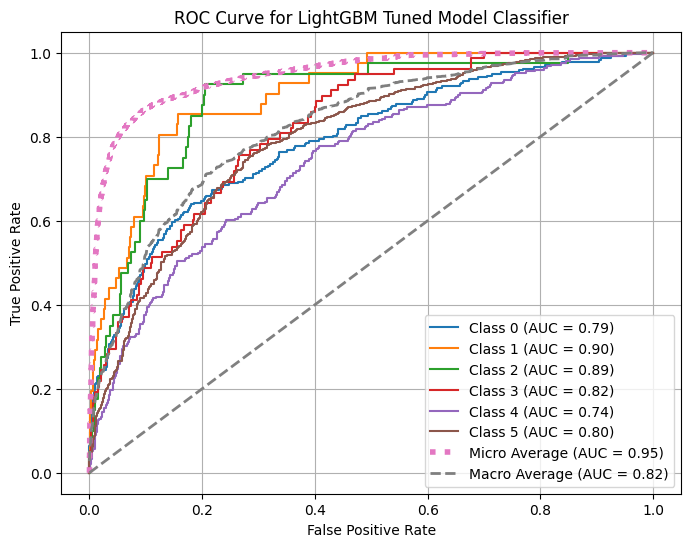

In [17]:
plot_roc_curve(y_validation, x_validation, best_lgb_classifier, "LightGBM Tuned Model")

# Analysing Best Three Model report by graph

In [3]:
# Define the classification reports for each model
# Assuming you have classification reports for LightGBM, XGBoost, and Random Forest
lgbm_report = {
    'precision': [0.57, 0.39, 0.38, 0.34, 0.44, 0.81],
    'recall': [0.22, 0.17, 0.07, 0.14, 0.11, 0.98],
    'f1-score': [0.32, 0.24, 0.12, 0.20, 0.18, 0.88]
}

xgboost_report = {
    'precision': [0.59, 0.41, 0.00, 0.32, 0.41, 0.80],
    'recall': [0.17, 0.17, 0.00, 0.12, 0.07, 0.98],
    'f1-score': [0.26, 0.24, 0.00, 0.17, 0.12, 0.88]
}

random_forest_report = {
    'precision': [0.95, 0.67, 1.00, 0.8, 1.00, 0.77],
    'recall': [0.08, 0.05, 0.03, 0.05, 0.02, 1.00],
    'f1-score': [0.15, 0.09, 0.05, 0.10, 0.03, 0.87]
}

# Accuracy values for different models
accuracies = [0.7818115144847818, 0.7785111844517785,  0.7744774477447744 ]

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
metrics = ['precision', 'recall', 'f1-score']
models = [ 'LightGBM', 'XGBoost', 'Random Forest']

# Now you can use these reports in the data list
data = [lgbm_report, xgboost_report, random_forest_report]

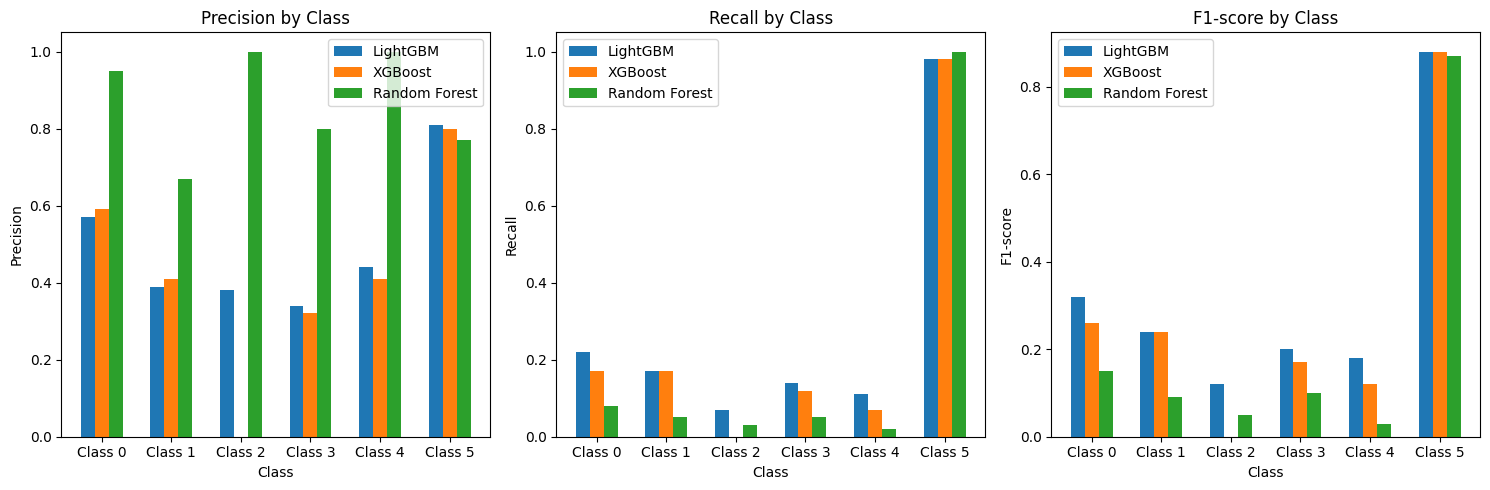

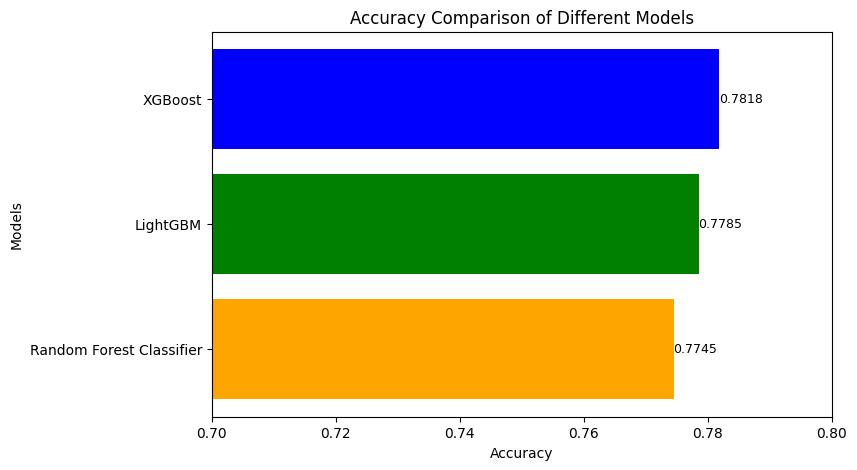

In [6]:
# Plotting metrics by class for different models
plt.figure(figsize=(15, 5))

# Loop through each metric
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    
    # Loop through each model
    for j, model in enumerate(models):
        # Extract scores for the current metric and model
        scores = [data[j][metric][k] for k in range(len(classes))]
        # Plot the bar chart for the current model
        plt.bar(np.arange(len(classes)) + j*0.2, scores, width=0.2, label=model)

    plt.xlabel('Class')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} by Class')
    plt.xticks(np.arange(len(classes)) + 0.2, classes)
    plt.legend()

plt.tight_layout()
plt.show()


models = ['XGBoost', 'LightGBM',  'Random Forest Classifier']

# Plotting accuracy comparison of different models
plt.figure(figsize=(8, 5))
bars = plt.barh(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0.7, 0.8)  # Setting x-axis limits for better visualization
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Adding accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc:.4f}', 
             va='center', ha='left', fontsize=9)

plt.show()


In [12]:
##Final Model is XGBOOST
y_pred = xgb_classifier.predict(processed_test_data)

predicted = pd.DataFrame({'ID': np.arange(1,4547), 'Rating': y_pred })
predicted.to_csv("submission.csv", index=False)